In [27]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

/tmp/ipykernel_11312/1351299970.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('TrainingData.csv')
/tmp/ipykernel_11312/1351299970.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('testX.csv')


In [3]:
train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0


In [4]:
columns = ['ID',
           'Credit Worthiness Score',
           'Number and Riskiness of Credit Enquiry',
           'Default Severity (Any Loan)',
           'Default Severity (Auto Loan)',
           'Default Severity (Education Loan)',
           'Min Cred Available (Revolving Credit Cards)',
           'Max Cred Available (Active Credit Lines)',
           'Max Cred Available (Active Revolving Credit Cards)',
           'Total Available Credit (Cards with 1 missed payment)',
           'Total Credit Available',
           'Dues Collected Post Default',
           'Total Amount Due (Active Cards)',
           'Credit Amount Paid (Prev Year)',
           'Annual Income',
           'Property Value',
           'Full Credit Utilisation (Revolving Credit Cards)',
           'Full Credit Utilisation (Credit Cards)',
           'Full Credit Utilisation (Credit Lines)',
           '>75 percent Credit Utilisation (Credit Cards)',
           '>75 percent Credit Utilisation (Credit Lines)',
           'Average Utilisation (Revolving Credit Cards)',
           'Average Utilisation Last 2 Years (All Credit Lines)',
           'Average Utilisation Last Year (All Credit Cards)',
           'Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards)',
           'Average Tenure (Active Revolving Credit Cards)',
           'Tenure of Oldest Active Credit Card',
           'Tenure of Oldest Active Revolving Credit Card',
           'Days Since Last Missed Payment',
           'Tenure of Oldest Credit Line',
           'Max Tenure (Auto Loans)',
           'Max Tenure (Education Loans)',
           'Sum of Tenures (Active Credit Cards)',
           'Stay Duration of Current Residence',
           'Credit Lines with 1 Missed Payment (Last 6 Months)',
           'Revolving Credit Cards with 1 Missed Payment (Last 2 Years)',
           'Active Credit Lines',
           'Credit Cards with >2Y Tenure',
           'Credit Lines activated Prev 2 Years',
           'Credit Lines with Current Delinquency',
           'Utilization on Active Education Loans',
           'Utilization on Active Auto Loans',
           'Financial Stress Index',
           'Credit Lines with No Missed Payments (Prev 2 Years)',
           'Ratio(Max Amount Due : Sum of Amounts Due)',
           'Mortgage Loans (With 2 Missed Payements)',
           'Auto Loans (With 2 Missed Payments)',
           'Type of Product',
           'Int Value for an Application',
           'Bucketized Credit Worthiness Score',
           'Compound of mvar49 and mvar48',
           'mvar51',
           'default_ind']

In [5]:
train.columns = columns
test.columns = columns[:-1]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 53 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ID                                                                      83000 non-null  int64  
 1   Credit Worthiness Score                                                 83000 non-null  object 
 2   Number and Riskiness of Credit Enquiry                                  77114 non-null  float64
 3   Default Severity (Any Loan)                                             82465 non-null  float64
 4   Default Severity (Auto Loan)                                            82465 non-null  float64
 5   Default Severity (Education Loan)                                       82465 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                             83000 

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47000 entries, 0 to 46999
Data columns (total 52 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   ID                                                                      47000 non-null  int64  
 1   Credit Worthiness Score                                                 47000 non-null  object 
 2   Number and Riskiness of Credit Enquiry                                  43673 non-null  float64
 3   Default Severity (Any Loan)                                             46706 non-null  float64
 4   Default Severity (Auto Loan)                                            46706 non-null  float64
 5   Default Severity (Education Loan)                                       46706 non-null  float64
 6   Min Cred Available (Revolving Credit Cards)                             47000 

In [8]:
train.replace('missing', np.nan, inplace = True)
train.replace('na', np.nan, inplace = True)
train.replace('#VALUE!', np.nan, inplace = True)

test.replace('missing', np.nan, inplace = True)
test.replace('na', np.nan, inplace = True)
test.replace('#VALUE!', np.nan, inplace = True)

def convert_to_int(entry):
    return float(entry)

for col in train.columns:
    if col != 'Type of Product':
        train[col] = train[col].apply(convert_to_int)
    if col not in ['Type of Product', 'default_ind']:
        test[col] = test[col].apply(convert_to_int)

### Check For Adverserial Validation

In [9]:
train_stats = train.drop(['ID', 'default_ind'], axis = 1).describe()
test_stats = test.drop(['ID'], axis = 1).describe()

diff = (train_stats - test_stats)/train_stats
diff

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,0.435175,0.433657,0.433626,0.433626,0.433626,0.435963,0.435507,0.435970,0.436496,0.433639,0.435493,0.435810,0.438106,0.433735,0.430812,0.435874,0.435076,0.435032,0.433785,0.433639,0.435319,0.433769,0.434171,0.436994,0.435678,0.437152,0.436929,0.433639,0.433639,0.432929,0.433506,0.435678,0.433472,0.433639,0.434160,0.432998,0.435678,0.433639,0.434310,0.436754,0.427184,0.434000,0.433620,0.434650,0.434574,0.437126,0.433735,0.433735,0.435175,0.435175
mean,0.000567,-0.058354,0.008570,0.005924,-0.035125,-0.025014,-0.036354,-0.014453,-0.026747,-0.033594,0.044252,-0.045565,-0.079081,0.026351,-0.018167,-0.127402,-0.104019,-0.104823,-0.021150,-0.020492,-0.012186,-0.020910,-0.016005,0.020430,-0.006069,-0.011625,-0.010430,0.006819,-0.011605,0.006121,-0.006293,-0.013660,-0.020667,-0.009919,-0.059748,0.004673,0.008657,-0.001796,-0.074011,-0.007393,-0.002732,-0.013643,0.010745,0.000345,-0.032741,0.013322,-0.003344,0.001647,0.000292,0.001507
std,-0.006273,-0.097285,0.004949,-0.061047,-0.059061,-0.032103,-0.074717,-0.033260,-0.087928,-0.034922,0.232080,-0.053378,-0.398412,-0.066879,-0.028150,-0.063493,-0.050782,-0.055364,-0.009304,-0.010077,0.001929,-0.006797,-0.000565,0.175689,-0.009701,-0.021666,-0.023146,0.002289,-0.018922,-0.004434,0.001604,-0.031204,-0.018776,0.007303,-0.053845,0.006326,0.004159,-0.013239,0.013968,-0.049715,-0.003118,-0.014814,0.003107,0.001710,-0.021261,-0.040805,0.000095,-0.003695,0.001318,-0.001848
min,-0.011510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.739726,NaN,NaN,NaN,NaN,NaN,-0.452991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,-1.142857,NaN,NaN,NaN,-0.231124,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.001190,-0.025038,NaN,NaN,NaN,0.219512,0.006428,0.016129,0.015315,0.071119,-0.027982,-0.062958,-0.170690,0.000000,0.002341,NaN,NaN,NaN,NaN,NaN,-0.019903,-0.084734,-0.024459,-0.064756,0.004762,0.000000,0.029108,0.000000,-0.009217,0.025295,-0.029497,0.019802,0.066640,NaN,NaN,0.000000,0.000000,0.000000,NaN,-0.006872,-0.002634,NaN,0.000000,-0.001417,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,0.000574,-0.031384,0.000000,NaN,NaN,0.000000,-0.018304,0.00398

In [10]:
train_stats

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,79267.000000,77114.000000,82465.000000,82465.000000,82465.000000,63299.000000,7.532600e+04,63291.000000,71318.000000,8.246500e+04,3.628300e+04,68422.000000,7.331100e+04,8.300000e+04,4.948100e+04,63757.000000,66501.000000,67641.000000,82995.000000,82465.000000,59538.000000,52332.000000,40689.000000,63470.000000,75138.000000,72071.000000,69350.000000,82465.000000,82465.000000,45012.000000,24461.000000,75138.000000,81131.000000,82465.000000,48132.000000,79841.000000,75138.000000,82465.000000,76671.000000,17930.000000,25736.000000,80977.000000,82111.000000,74851.000000,37080.000000,59397.000000,83000.000000,83000.000000,79267.000000,79267.000000
mean,1747.511865,1.054816,5.401784,0.461151,1.084012,1633.429280,1.750797e+04,6822.332227,34030.596329,3.022857e+04,5.563995e+03,6975.314709,1.549526e+04,1.894841e+05,2.914902e+05,0.217686,0.251906,0.257669,0.915188,0.998508,57.302429,4347.490308,4241.010319,70.640478,1770.227688,3397.254166,3124.324441,8810.980464,5524.663639,2625.577602,3635.396550,473.785595,6.983915,0.226593,0.188793,6.381245,4.344553,4.223780,0.087673,97.851158,72.016570,0.331550,6.553604,0.706595,0.070523,0.093187,556.021277,600.127494,4.285201,2570.704518
std,94.830127,1.556682,11.091569,1.704292,5.743899,3667.183981,4.677222e+04,10060.346814,50673.150005,6.617798e+04,1.697567e+04,11505.727292,5.230836e+04,7.427382e+06,3.000244e+05,0.599314,0.686673,0.692616,1.680702,1.731003,35.614851,3790.531813,3855.423204,333.609078,1314.641837,2921.584652,2684.038189,13555.003070,3226.160311,1554.202414,2037.800167,517.527993,7.625562,0.675262,0.547573,5.269819,4.706051,3.896741,0.423403,29.530657,24.508469,0.373973,6.273107,0.245915,0.290383,0.329054,1106.953295,144.441805,0.451513,679.544764
min,1477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.387000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.117000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.060660,0.00000

In [11]:
test_stats

,Credit Worthiness Score,Number and Riskiness of Credit Enquiry,Default Severity (Any Loan),Default Severity (Auto Loan),Default Severity (Education Loan),Min Cred Available (Revolving Credit Cards),Max Cred Available (Active Credit Lines),Max Cred Available (Active Revolving Credit Cards),Total Available Credit (Cards with 1 missed payment),Total Credit Available,Dues Collected Post Default,Total Amount Due (Active Cards),Credit Amount Paid (Prev Year),Annual Income,Property Value,Full Credit Utilisation (Revolving Credit Cards),Full Credit Utilisation (Credit Cards),Full Credit Utilisation (Credit Lines),>75 percent Credit Utilisation (Credit Cards),>75 percent Credit Utilisation (Credit Lines),Average Utilisation (Revolving Credit Cards),Average Utilisation Last 2 Years (All Credit Lines),Average Utilisation Last Year (All Credit Cards),Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards),Average Tenure (Active Revolving Credit Cards),Tenure of Oldest Active Credit Card,Tenure of Oldest Active Revolving Credit Card,Days Since Last Missed Payment,Tenure of Oldest Credit Line,Max Tenure (Auto Loans),Max Tenure (Education Loans),Sum of Tenures (Active Credit Cards),Stay Duration of Current Residence,Credit Lines with 1 Missed Payment (Last 6 Months),Revolving Credit Cards with 1 Missed Payment (Last 2 Years),Active Credit Lines,Credit Cards with >2Y Tenure,Credit Lines activated Prev 2 Years,Credit Lines with Current Delinquency,Utilization on Active Education Loans,Utilization on Active Auto Loans,Financial Stress Index,Credit Lines with No Missed Payments (Prev 2 Years),Ratio(Max Amount Due : Sum of Amounts Due),Mortgage Loans (With 2 Missed Payements),Auto Loans (With 2 Missed Payments),Int Value for an Application,Bucketized Credit Worthiness Score,Compound of mvar49 and mvar48,mvar51
count,44772.000000,43673.000000,46706.000000,46706.000000,46706.000000,35703.000000,4.252100e+04,35698.000000,4.018800e+04,4.670500e+04,20482.000000,38603.000000,4.119300e+04,4.700000e+04,2.816400e+04,35967.000000,37568.000000,38215.000000,46993.000000,46705.000000,33620.000000,29632.000000,23023.000000,35734.000000,42402.000000,40565.000000,39049.000000,46705.000000,46705.000000,25525.000000,13857.000000,42402.000000,45963.000000,46705.000000,27235.000000,45270.000000,42402.000000,46705.000000,43372.000000,10099.000000,14742.000000,45833.000000,46506.000000,42317.000000,20966.000000,33433.000000,47000.000000,47000.000000,44772.000000,44772.000000
mean,1746.520705,1.116369,5.355489,0.458419,1.122088,1674.288435,1.814447e+04,6920.934814,3.494081e+04,3.124406e+04,5317.779221,7293.145999,1.672063e+04,1.844909e+05,2.967859e+05,0.245419,0.278109,0.284679,0.934543,1.018970,58.000738,4438.397030,4308.885982,69.197307,1780.971841,3436.747861,3156.912187,8750.896928,5588.776298,2609.506523,3658.275601,480.257276,7.128250,0.228841,0.200073,6.351425,4.306943,4.231367,0.094162,98.574587,72.213300,0.336073,6.483185,0.706351,0.072832,0.091945,557.880872,599.139021,4.283950,2566.831323
std,95.424977,1.708123,11.036674,1.808334,6.083141,3784.913417,5.026692e+04,10394.951273,5.512873e+04,6.848903e+04,13035.957024,12119.885053,7.314863e+04,7.924119e+06,3.084702e+05,0.637366,0.721543,0.730963,1.696339,1.748447,35.546141,3816.294436,3857.599935,274.997747,1327.394528,2984.883691,2746.163223,13523.978884,3287.206385,1561.093141,2034.532249,533.676991,7.768741,0.670331,0.577058,5.236483,4.686477,3.948332,0.417489,30.998772,24.584893,0.379513,6.253618,0.245495,0.296557,0.342482,1106.847627,144.975517,0.450918,680.800786
min,1494.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,2.413000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.074680,0.000000

In [12]:
mean = diff.loc['mean']
std = diff.loc['std']

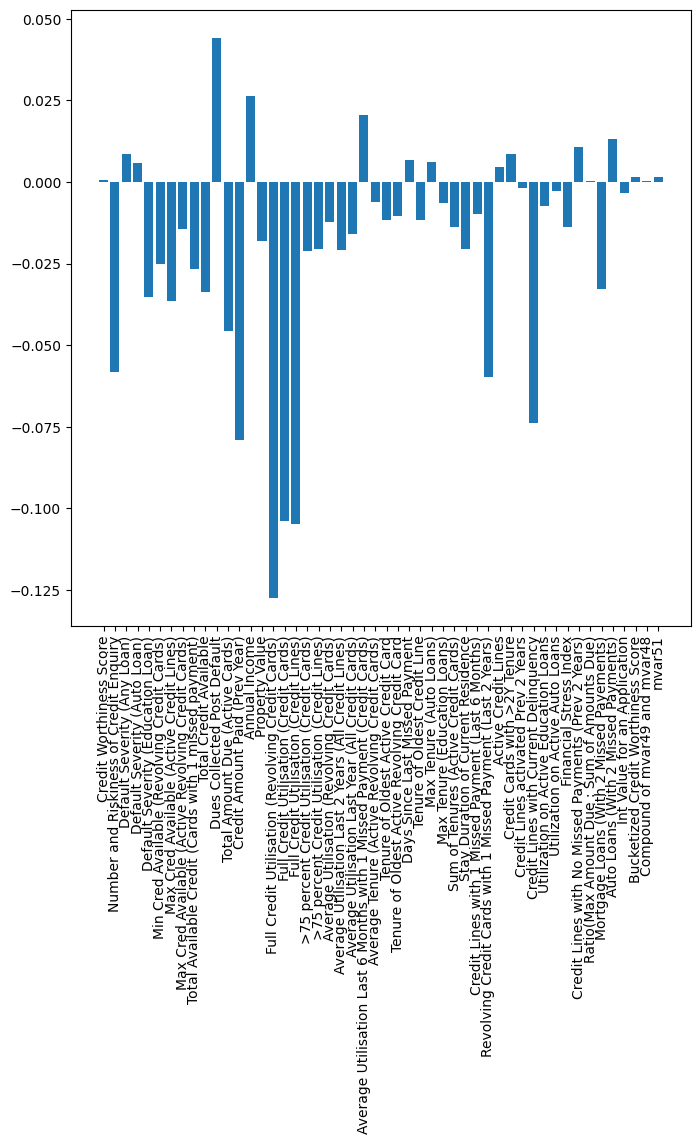

In [13]:
plt.figure(figsize = (8, 8))
plt.bar(mean.index, mean.values)
plt.xticks(rotation=90)
plt.show()

### Feature Understanding (Explanations and Stuff to Look into)

- Auto Loans: Loans where Vehicles are kept as collateral
- Revolving Credit: You have a fixed amount that you can borrow in some fixed time frame. After that the amount you can borrow replenishes to the full amount. Although you will have a maximum limit. For example, you can borrow 100 rupees a month max and the overall limit on that credit line is 500 rupees. So if your overall borrowed amount is 460 rupees and for that month you havenn't borrowed anything so far, you will be able to borrow only 40 rupees even though the monthly limit is 100
- Difference between Credit Worthiness Score and its bucketized version?
- Difference in statistics between train and test (Need for Adverserial Validation?)

### Feature Ideas and Experiments
- Credit Amount Paid / Number of Credit Lines with No Missed Payments
- Max Cred Available vs Default Severity
- Separate modeling for 0 Default Severity vs Non-Zero Default Severity
- KNN Missing Values Fill In
- Property Value vs Annual Income (Some Indicator of whether or not a person spends too much for their Income)
- 75% utilisation / Full Utilisation

In [14]:
df = pd.concat([train, test], axis = 0)
df.shape

(130000, 53)

In [15]:
df[['Credit Worthiness Score', 'Bucketized Credit Worthiness Score']].head(10)

,Credit Worthiness Score,Bucketized Credit Worthiness Score
0,1696.0,770.0
1,1846.0,437.0
2,1745.0,795.0
3,1739.0,755.0
4,1787.0,425.0
5,1579.0,455.0
6,1818.0,392.0
7,NaN,615.0
8,1836.0,821.0
9,1839.0,408.0


In [17]:
df['Credit_Ratio'] = df['Credit Amount Paid (Prev Year)']/ df['Credit Lines with No Missed Payments (Prev 2 Years)']


In [60]:
df.columns

Index(['ID', 'Credit Worthiness Score',
       'Number and Riskiness of Credit Enquiry', 'Default Severity (Any Loan)',
       'Default Severity (Auto Loan)', 'Default Severity (Education Loan)',
       'Min Cred Available (Revolving Credit Cards)',
       'Max Cred Available (Active Credit Lines)',
       'Max Cred Available (Active Revolving Credit Cards)',
       'Total Available Credit (Cards with 1 missed payment)',
       'Total Credit Available', 'Dues Collected Post Default',
       'Total Amount Due (Active Cards)', 'Credit Amount Paid (Prev Year)',
       'Annual Income', 'Property Value',
       'Full Credit Utilisation (Revolving Credit Cards)',
       'Full Credit Utilisation (Credit Cards)',
       'Full Credit Utilisation (Credit Lines)',
       '>75 percent Credit Utilisation (Credit Cards)',
       '>75 percent Credit Utilisation (Credit Lines)',
       'Average Utilisation (Revolving Credit Cards)',
       'Average Utilisation Last 2 Years (All Credit Lines)',
       

In [59]:
##Some Helper Functions for Visuals

def get_hist(col, num_bins = 80, fig_size = (8, 8)):
    plt.figure(figsize = fig_size)
    plt.hist(col, bins = num_bins)
    plt.xlabel(col.name)
    
def get_fit(col):
    f = Fitter(col, timeout = 30000,
               distributions = ['gamma',
                                'expon',
                                'lognorm',
                                'norm',
                                'pareto'])
    f.fit()
    print(f.summary())
    print(f.get_best(method = 'sumsquare_error'))

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:02<00:00,  1.46it/s]


None
         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.000022  1328.528341 -2.784067e+06     inf      0.032693   
norm            0.000025  1317.560188 -2.768104e+06     inf      0.035668   
pareto          0.000393  1300.883776 -2.427264e+06     inf      0.316701   
expon           0.000393  1298.883765 -2.427276e+06     inf      0.316701   

             ks_pvalue  
lognorm  1.294604e-115  
norm     1.530038e-137  
pareto    0.000000e+00  
expon     0.000000e+00  
{'lognorm': {'s': 0.05872141177827067, 'loc': 128.3354111337136, 'scale': 1616.0312702037636}}


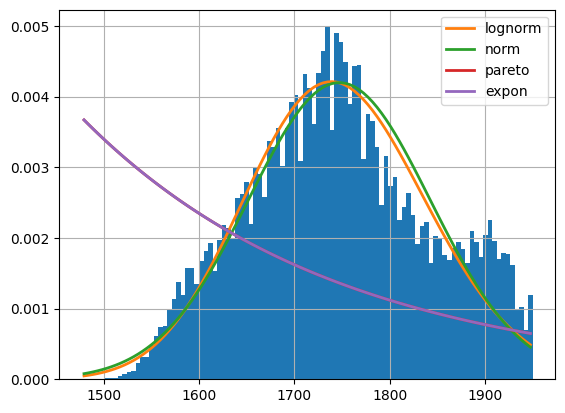

In [58]:
get_fit(df['Credit Worthiness Score'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:00<00:00,  5.79it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
pareto          0.008901   1534.197805 -1.983699e+06     inf      0.090150   
lognorm         0.019112   1375.289091 -1.891396e+06     inf      0.073040   
expon           0.112854   4162.502544 -1.676916e+06     inf      0.144297   
norm            0.736127  23989.018781 -1.450403e+06     inf      0.252193   

         ks_pvalue  
pareto         0.0  
lognorm        0.0  
expon          0.0  
norm           0.0  
{'pareto': {'b': 1.9258159521635958, 'loc': -1.1325515745229406, 'scale': 1.1325515745229404}}


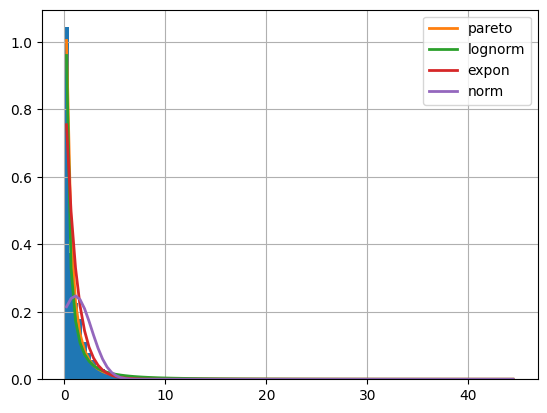

In [62]:
get_fit(df['Number and Riskiness of Credit Enquiry'].dropna().values)

<AxesSubplot: >

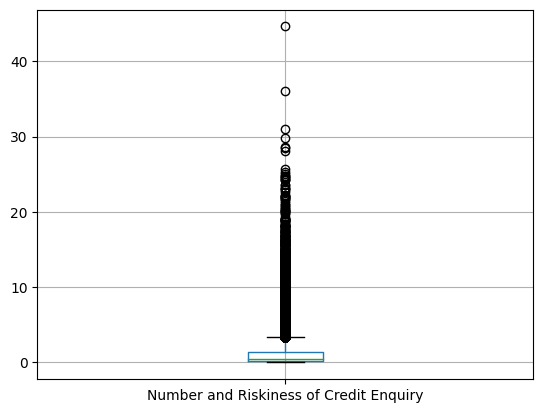

In [73]:
df.boxplot(column = 'Number and Riskiness of Credit Enquiry')

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:02<00:00,  1.89it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon           0.003576   7756.336525 -2.247872e+06     inf      0.466095   
pareto          0.003576   7758.335746 -2.247860e+06     inf      0.466095   
norm            0.020152  42300.391689 -2.024515e+06     inf      0.313349   
lognorm         0.023028   1657.270071 -2.007274e+06     inf      0.466095   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 5.385044855269372}}


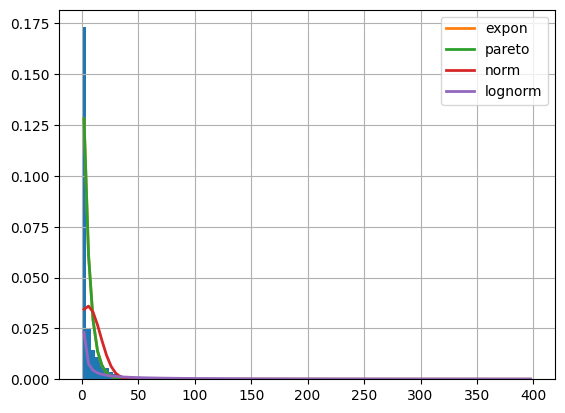

In [63]:
get_fit(df['Default Severity (Any Loan)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:01<00:00,  2.22it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon           0.030955   24773.833504 -1.969073e+06     inf      0.864350   
pareto          0.030955   24775.823944 -1.969061e+06     inf      0.864350   
norm            0.353924  142965.865787 -1.654342e+06     inf      0.468485   
lognorm         0.537539    1466.613709 -1.600348e+06     inf      0.864340   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 0.46016323245929813}}


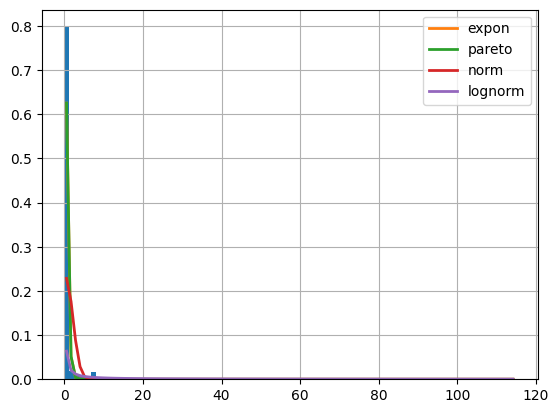

In [64]:
get_fit(df['Default Severity (Auto Loan)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:01<00:00,  2.82it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon           0.008595  20657.669621 -2.134593e+06     inf      0.903856   
pareto          0.008595  20659.667400 -2.134581e+06     inf      0.903856   
norm            0.123701  49483.350669 -1.790129e+06     inf      0.478047   
lognorm         0.168333  32392.342251 -1.750323e+06     inf      0.859953   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 1.0977798499663236}}


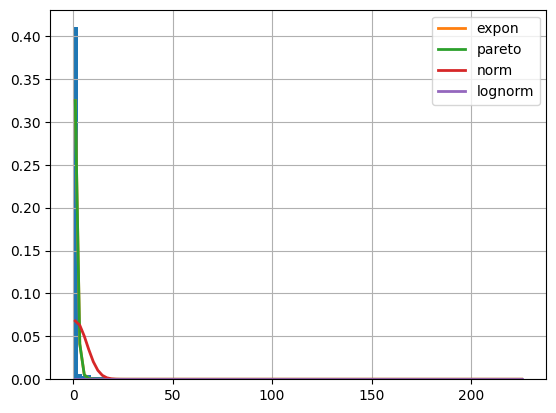

In [65]:
get_fit(df['Default Severity (Education Loan)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:01<00:00,  2.23it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon       3.514356e-08   9773.188878 -2.838040e+06     inf      0.352220   
pareto      1.907094e-07   2924.507672 -2.670585e+06     inf      0.203797   
norm        2.059144e-07  45398.159979 -2.663002e+06     inf      0.328435   
lognorm     2.511726e-07   2870.706464 -2.643321e+06     inf      0.355078   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 1648.164279509505}}


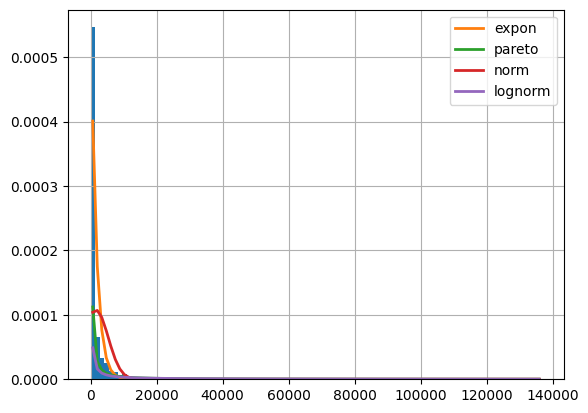

In [66]:
get_fit(df['Min Cred Available (Revolving Credit Cards)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:01<00:00,  3.94it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       2.675139e-11   33741.191939 -4.245011e+06     inf      0.180130   
norm        7.958585e-11  456549.054686 -4.116529e+06     inf      0.356045   
pareto      1.253203e-10    4377.061463 -4.063010e+06     inf      0.073780   
lognorm     1.364699e-10    4332.626975 -4.052966e+06     inf      0.077739   

         ks_pvalue  
expon          0.0  
norm           0.0  
pareto         0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 17737.62977419875}}


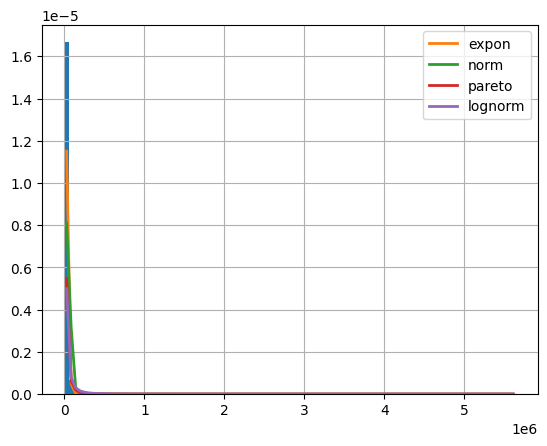

In [67]:
get_fit(df['Max Cred Available (Active Credit Lines)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:00<00:00,  5.18it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
pareto      4.476183e-10   3122.065439 -3.269557e+06     inf      0.081904   
lognorm     2.967796e-09   3051.983793 -3.082306e+06     inf      0.074336   
expon       5.555775e-09   6025.729372 -3.020249e+06     inf      0.221207   
norm        2.194972e-08  27525.113270 -2.884247e+06     inf      0.250311   

         ks_pvalue  
pareto         0.0  
lognorm        0.0  
expon          0.0  
norm           0.0  
{'pareto': {'b': 1.0044596338524396, 'loc': -2186.14126648737, 'scale': 2186.1412664873696}}


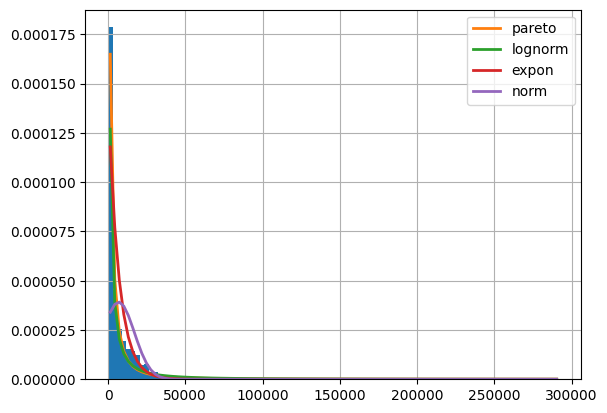

In [68]:
get_fit(df['Max Cred Available (Active Revolving Credit Cards)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:02<00:00,  1.67it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       3.998439e-12   20526.772676 -4.910245e+06     inf      0.247761   
norm        8.835065e-11  235206.047244 -4.510411e+06     inf      0.324019   
lognorm     1.772166e-10    3594.573717 -4.420489e+06     inf      0.255915   
pareto      1.812901e-10    3682.965851 -4.417554e+06     inf      0.299513   

         ks_pvalue  
expon          0.0  
norm           0.0  
lognorm        0.0  
pareto         0.0  
{'expon': {'loc': 0.0, 'scale': 30595.75169156925}}


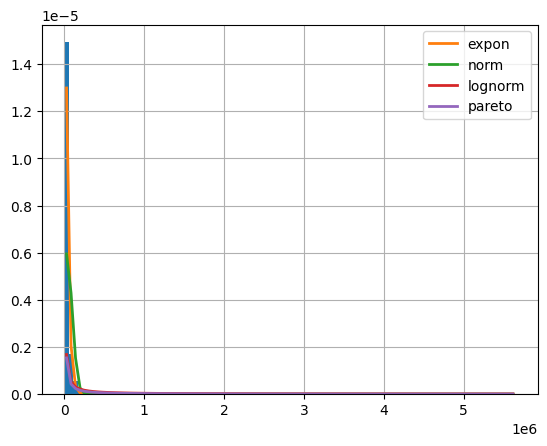

In [69]:
get_fit(df['Total Credit Available'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:00<00:00,  4.42it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       7.601446e-12   12896.257234 -4.150734e+06     inf      0.172966   
pareto      1.912037e-11    3986.845053 -4.047867e+06     inf      0.068114   
lognorm     5.333021e-11    3920.854423 -3.933490e+06     inf      0.054881   
norm        1.533812e-10  165491.767407 -3.815704e+06     inf      0.255703   

             ks_pvalue  
expon     0.000000e+00  
pareto    0.000000e+00  
lognorm  2.370878e-292  
norm      0.000000e+00  
{'expon': {'loc': 0.0, 'scale': 34358.64807274945}}


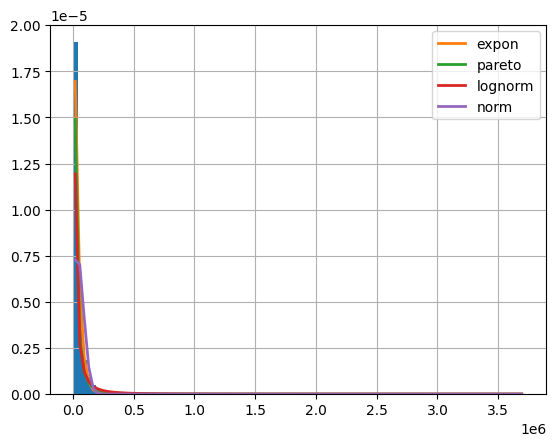

In [70]:
get_fit(df['Total Available Credit (Cards with 1 missed payment)'].dropna().values)

Fitting 4 distributions: 100%|████████████████████| 4/4 [00:00<00:00,  6.21it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       2.919360e-10   35470.995403 -1.867613e+06     inf      0.221288   
norm        7.335208e-10  461467.688656 -1.815314e+06     inf      0.363385   
lognorm     1.271357e-09    4406.587279 -1.784083e+06     inf      0.021405   
pareto      1.294702e-09    4135.740089 -1.783050e+06     inf      0.025014   

            ks_pvalue  
expon    0.000000e+00  
norm     0.000000e+00  
lognorm  5.043557e-23  
pareto   2.746374e-31  
{'expon': {'loc': 0.0, 'scale': 5475.155095569453}}


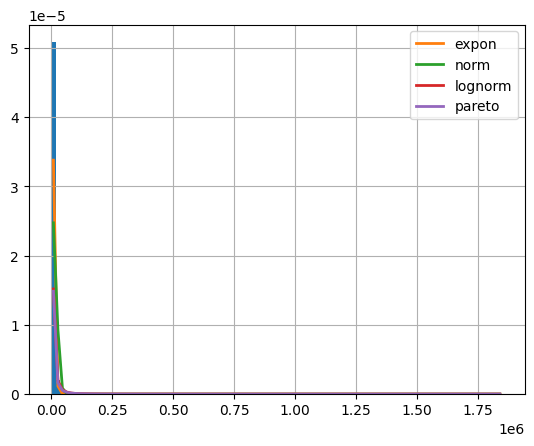

In [71]:
get_fit(df['Dues Collected Post Default'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:02<00:00,  2.36it/s]


{'pareto': {'b': 0.2285399655359335, 'loc': -30.192775038709716, 'scale': 30.192775038709712}}


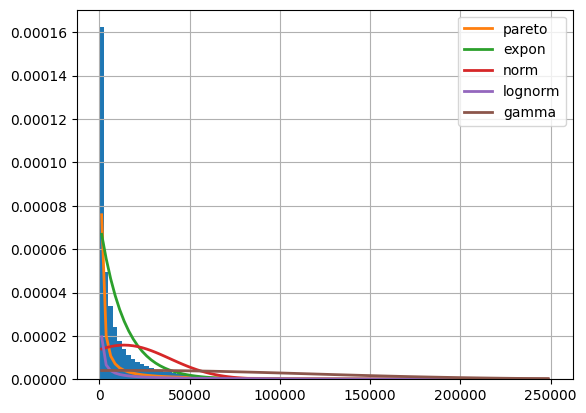

In [37]:
vals = df['Credit Amount Paid (Prev Year)'].dropna().values
get_fit(vals)